In [64]:
import json
import codecs
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, roc_curve, plot_roc_curve
import glob
from os import path
from statistics import mean
import pandas as pd
from matplotlib import pyplot as plt

## Parameters

In [2]:
results_path = 'results'
best_results_filename = 'best_results.txt'


In [3]:
all_files = glob.glob(f'{results_path}/*/{best_results_filename}')

## Collecting results

In [4]:
all_dev_acc_2 = []
all_dev_acc_3 = []
best_dev_acc_2 = -1
best_model2 = dict()
best_dev_acc_3 = -1
best_model3 = dict()
for filepath in all_files:
    with codecs.open(filepath, "r",  'utf-8-sig') as read_file:
        atae_data = json.load(read_file)
        t = atae_data['acc_train'] 
        d = atae_data['acc_dev']
        all_dev_acc_2.append(d['binary'])
        all_dev_acc_3.append(d['three-way'])
        
        best_model2 = atae_data if d['binary'] > best_dev_acc_2 else best_model2
        best_model3 = atae_data if d['three-way'] > best_dev_acc_3 else best_model3
        best_dev_acc_2 = d['binary'] if d['binary'] > best_dev_acc_2 else best_dev_acc_2
        best_dev_acc_3 = d['three-way'] if d['three-way'] > best_dev_acc_3 else best_dev_acc_3
        
        test = atae_data['acc_test']
        # print(f'dev {d}\ntest{test}')
        preds = np.array(atae_data['test']['preds']).argmax(axis = 1)
        targets = np.array(atae_data['test']['solutions']).argmax(axis = 1)
        cm = confusion_matrix(targets, preds)
        # print(cm)
print(f'mean dev acc binary {mean(all_dev_acc_2)}')
print(f'mean dev acc three-way {mean(all_dev_acc_3)}')
print(f'best acc binary -> {max(all_dev_acc_2)} best acc three-way -> {max(all_dev_acc_3)}')


mean dev acc binary 0.8511746186886937
mean dev acc three-way 0.6780263957261039
best acc binary -> 0.875 best acc three-way -> 0.7079207920792079


In [75]:
def calculate_metrics(best_model_results):
    preds = np.array(best_model_results['test']['preds']).argmax(axis = 1)
    pred_raw = best_model_results['test']['preds']
    targets = np.array(best_model_results['test']['solutions']).argmax(axis = 1)
    rep = pd.DataFrame(classification_report(y_true=targets, y_pred=preds, output_dict=True)).transpose()
    precision,recall,fscore,support = precision_recall_fscore_support(y_true=targets, y_pred=preds)
    cm = confusion_matrix(targets, preds)
    # fpr, tpr, thresholds = roc_curve(y_true=targets, y_score=pred_raw, pos_label=1)
    import scikitplot as skplt
    skplt.metrics.plot_roc(y_true = targets,y_probas = pred_raw)
    return rep, precision, recall, fscore, support, cm

## Test Acc for Best BINARY Model

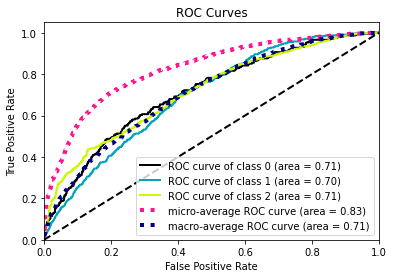

In [76]:
rep, precision, recall, fscore, support, cm = calculate_metrics(best_model2)

In [77]:
rep

,precision,recall,f1-score,support
0,0.542857,0.081197,0.141264,234.000000
1,0.397959,0.126623,0.192118,308.000000
2,0.687758,0.956938,0.800320,1045.000000
accuracy,0.666667,0.666667,0.666667,0.666667
macro avg,0.542858,0.388253,0.377901,1587.000000
weighted avg,0.610149,0.666667,0.585106,1587.000000


## Test Acc for Best THREE-WAY Model

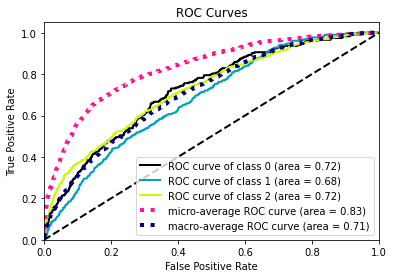

In [78]:
rep3, precision3, recall3, fscore3, support3, cm3 = calculate_metrics(best_model3)

In [79]:
rep3

,precision,recall,f1-score,support
0,0.434783,0.170940,0.245399,234.000000
1,0.388060,0.084416,0.138667,308.000000
2,0.696078,0.951196,0.803882,1045.000000
accuracy,0.667927,0.667927,0.667927,0.667927
macro avg,0.506307,0.402184,0.395982,1587.000000
weighted avg,0.597772,0.667927,0.592432,1587.000000


# ROC

In [73]:
best_model_results = best_model2
preds = np.array(best_model_results['test']['preds']).argmax(axis = 1)
pred_raw = best_model_results['test']['preds']
targets = np.array(best_model_results['test']['solutions']).argmax(axis = 1)

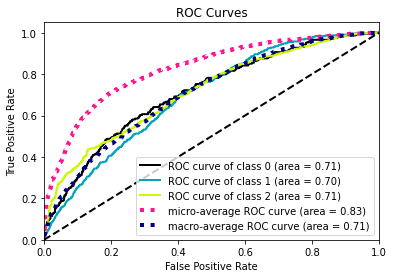

In [74]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_true = targets,y_probas = pred_raw)